In [6]:
import jieba
import jieba.posseg as pseg
import pandas as pd
import stylecloud
from IPython.display import Image 

In [7]:
df = pd.read_excel('联想笔记本电脑小新Air15锐龙版 15.6英寸全面屏办公轻薄本(8核R7-5700U 16G 512G 高色域 数字小键盘)深空灰数据.xlsx')
df['评论内容'] = df['评论内容'].astype(str)
df['评论内容'].dropna(how='any', inplace=True)
df['评论内容']

0      看了几款电脑，最终还是选择了小新air15.真没选错，5号下单，很快就到了，按照语音提示激活...
1      买电器还得上京东，方便快捷，品质有保证。电脑不错，用着很流畅，玩游戏也不卡机，画质清晰流畅，...
2      了解一段时间决定买联想，小新系列一直比较喜欢，平时主要使用PS，AI很快很流畅，轻度使用**...
3      笔记本电脑款式太多了，认准了买联想笔记本电脑。选了好久，最后选择了这款，主要是屏幕配置符合要...
4      对于我们电脑小白来说，因为是买来给大学女儿用的。所以在网上看了好久，各种对比。最终选择这个A...
                             ...                        
995                                 用着很舒服 客服小姐姐态度很好 值得购买
996                                      相当好帅气的，漂亮的，携带方便
997    生活的非常不错，运行速度快，屏幕效果显示非常好很好，没有什么声音，基本上听不到什么声音，外形...
998                                     这款电脑比较轻薄，运行速度也很快
999                                 给男朋友买的520礼物，他很喜欢！好评～
Name: 评论内容, Length: 1000, dtype: object

In [8]:
# 定义分词函数
def get_cut_words(content_series):
    # 读入停用词表
    stop_words = []

    with open("stopwords_cn.txt", 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())    
    list_word = []
    # 分词
    word_num = jieba.lcut(content_series.str.cat(sep='。'), cut_all=False)

    # 条件筛选
    word_num_selected = [i for i in word_num if i not in stop_words and len(i) >= 2]
    return word_num_selected



#定义机械压缩函数
def yasuo(st):
    for i in range(1,int(len(st)/2)+1):
        for j in range(len(st)):
            if st[j:j+i] == st[j+i:j+2*i]:
                k = j + i
                while st[k:k+i] == st[k+i:k+2*i] and k<len(st):   
                    k = k + i
                st = st[:j] + st[k:]    
    return st

def is_all_chinese(strs):
    for _char in strs:
        if not '\u4e00' <= _char <= '\u9fa5':
            return False
    return True


In [9]:
df['评论内容'] = df['评论内容'].apply(yasuo)
df['评论内容'].dropna(how='any', inplace=True)
df['评论内容']

0      看了几款电脑，最终还是选择了小新air15.真没选错，5号下单，很快就到了，按照语音提示激活...
1      买电器还得上京东，方便快捷，品质有保证。电脑不错，用着很流畅，玩游戏也不卡机，画质清晰流畅，...
2      了解一段时间决定买联想，小新系列一直比较喜欢，平时主要使用PS，AI很快很流畅，轻度使用*D...
3      笔记本电脑款式太多了，认准了买联想笔记本电脑。选了好久，最后选择了这款，主要是屏幕配置符合要...
4      对于我们电脑小白来说，因为是买来给大学女儿用的。所以在网上看了好久，各种对比。最终选择这个A...
                             ...                        
995                                  用着很舒服 客服小姐态度很好 值得购买
996                                      相当好帅气的，漂亮的，携带方便
997    生活的非常不错，运行速度快，屏幕效果显示非常好很好，没有什么声音，基本上听不到什么声音，外形...
998                                     这款电脑比较轻薄，运行速度也很快
999                                 给男朋友买的520礼物，他很喜欢！好评～
Name: 评论内容, Length: 1000, dtype: object

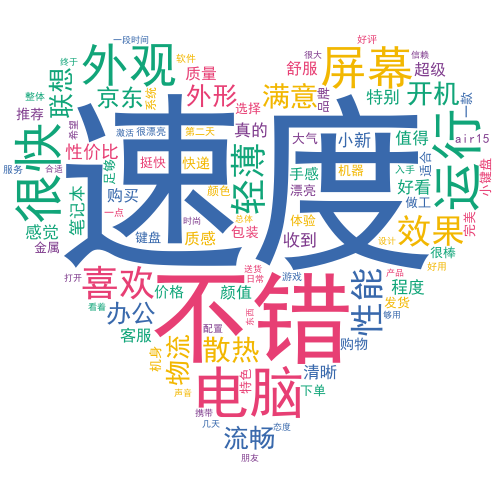

In [10]:
# 绘制词云图
text1 = get_cut_words(content_series=df['评论内容'])
stylecloud.gen_stylecloud(text=','.join(text1), max_words=100,
                          collocations=False,
                          font_path='simhei.ttf',
                          icon_name='fas fa-heart',
                          size=500,
                          #palette='matplotlib.Inferno_9',
                          output_name='联想热词-云图.png')
Image(filename='联想热词-云图.png')

In [11]:
# coding=utf-8
import jieba
import jieba.analyse
import re
import time
from collections import Counter


def is_all_chinese(strs):
    for _char in strs:
        if not '\u4e00' <= _char <= '\u9fa5':
            return False
    return True

cut_words = ""
all_words = ""
f = open('联想-fenci.txt', 'w', encoding='utf-8')
jieba.analyse.set_stop_words('stopwords_cn.txt')
for line in df['评论内容']:
    line = line.strip('\n')
    #停用词过滤
    line = re.sub('[0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~\s]+', "", line)
    seg_list = jieba.cut(line, cut_all=False)
    cut_words = (" ".join(seg_list))

    #计算关键词
    all_words = cut_words.split()
    c = Counter()
    for x in all_words:
        if len(x)>1 and x != '\r\n':
            if is_all_chinese(x) == True:
                c[x] += 1
    #Top50
    output = ""
    #print('\n词频统计结果：')
    for (k,v) in c.most_common():
        #print("%s:%d"%(k,v))
        output += k + " "
    
    f.write(output+"\n")
else:
    f.close()

Features length: 2235
Start Kmeans:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0
 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 0 0 0 0 0 0 0 0 

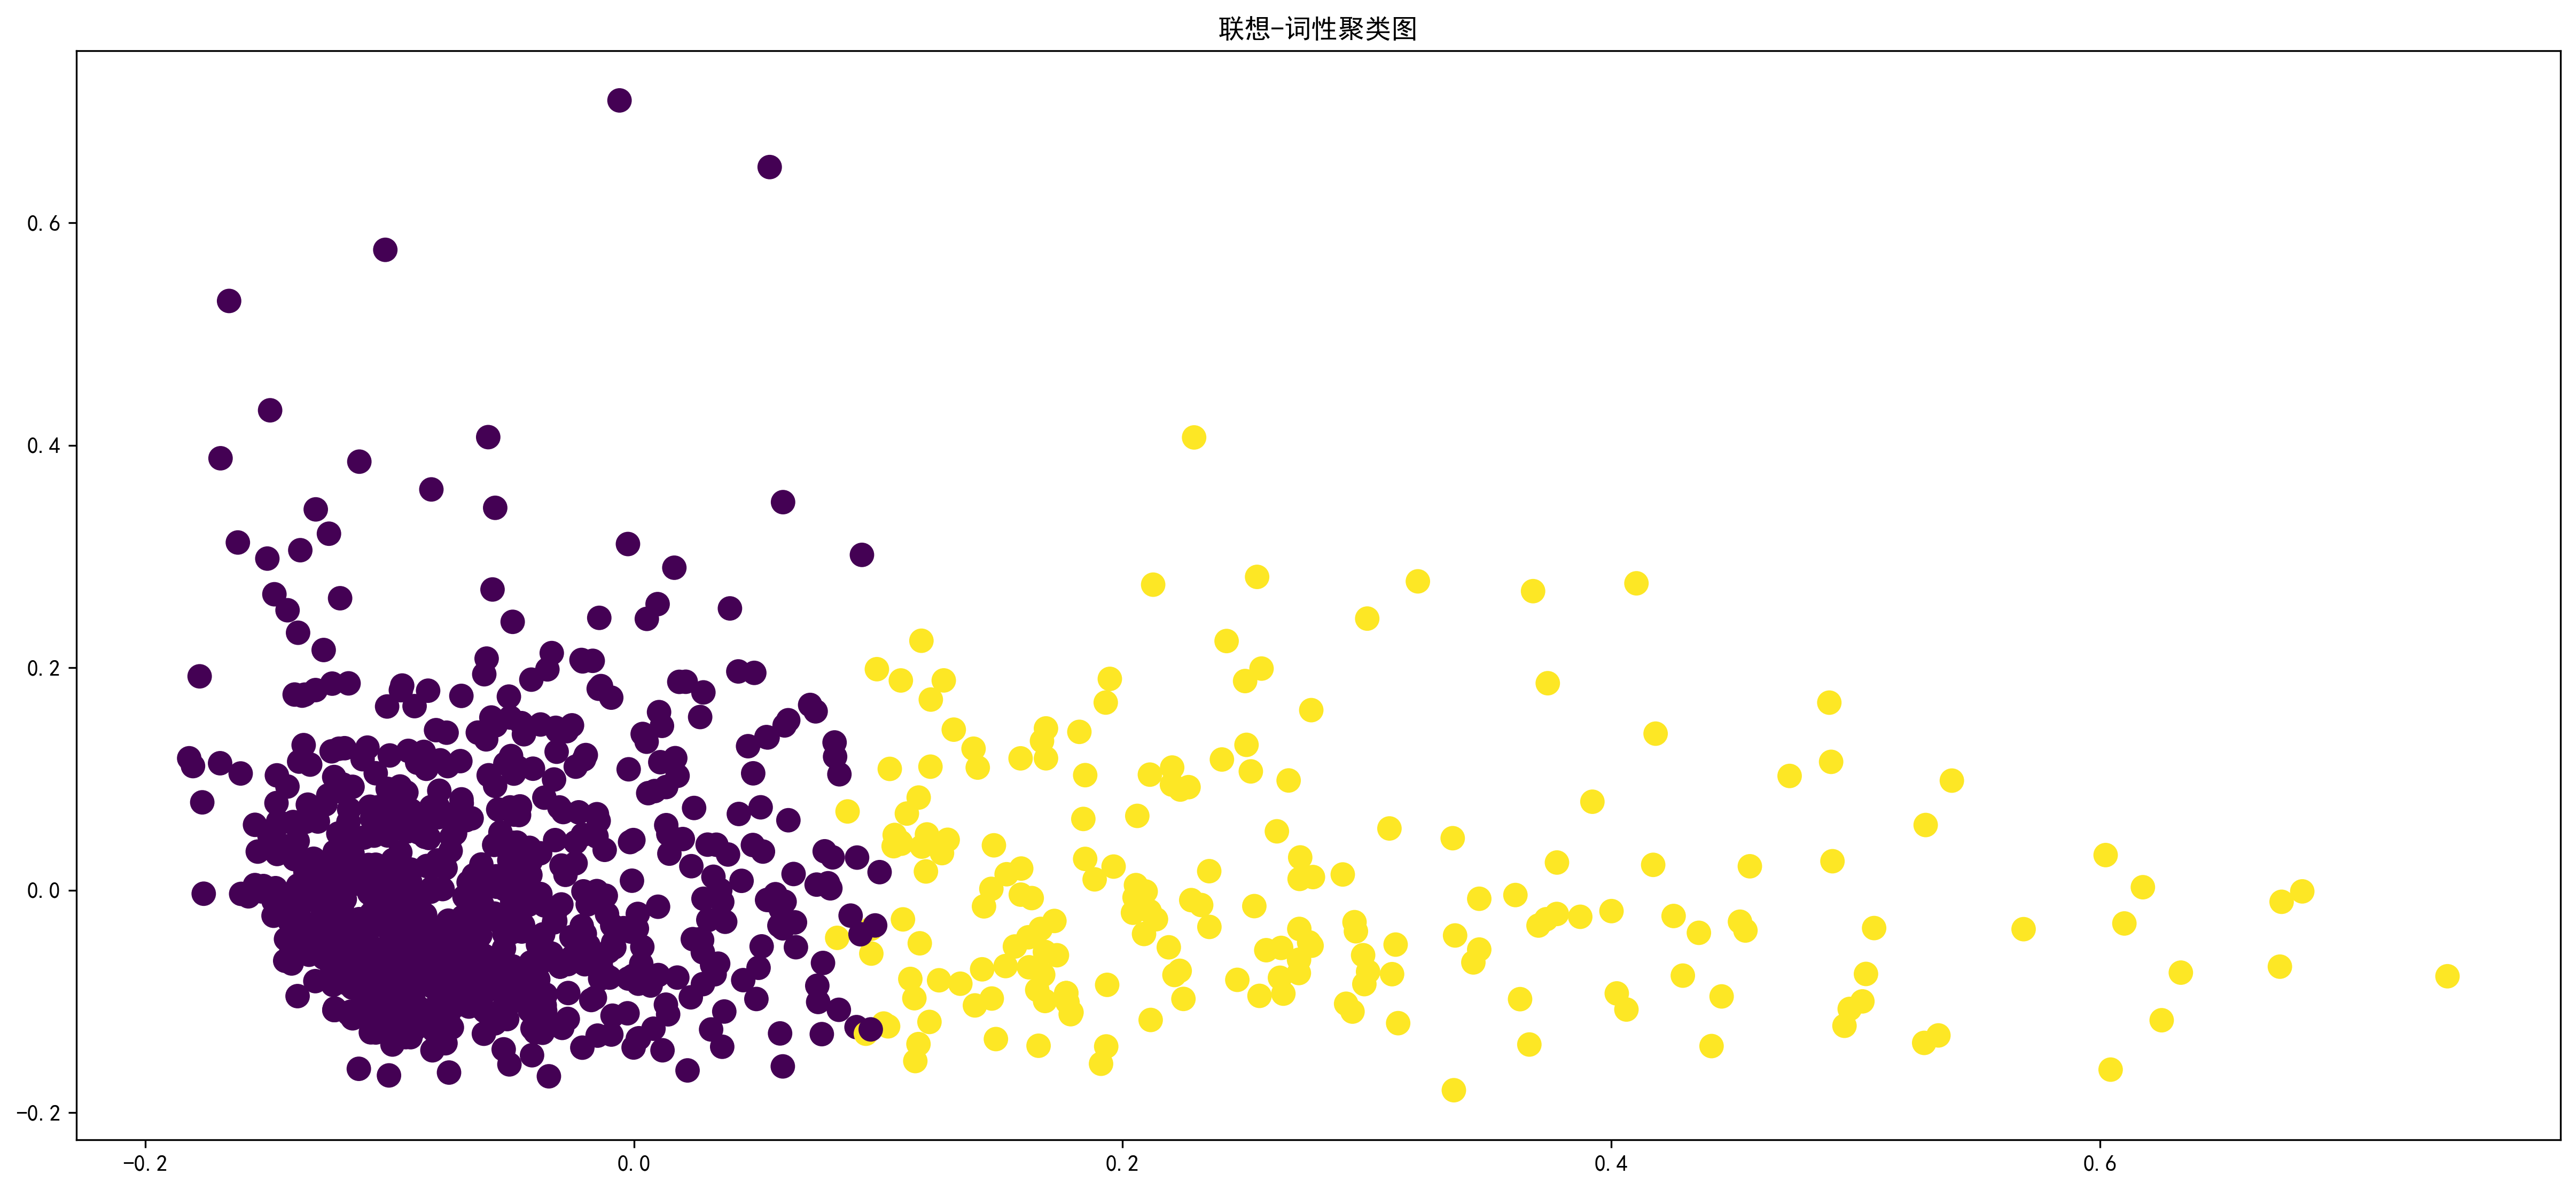

In [12]:
# coding=utf-8
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer



# 文档预料 空格连接
corpus = []

# 读取预料 一行预料为一个文档
for line in open('联想-fenci.txt', 'r',encoding='utf-8').readlines():
    corpus.append(line.strip())
# 将文本中的词语转换为词频矩阵 矩阵元素a[i][j] 表示j词在i类文本下的词频
vectorizer = CountVectorizer()

# 该类会统计每个词语的tf-idf权值
transformer = TfidfTransformer()

# 第一个fit_transform是计算tf-idf 第二个fit_transform是将文本转为词频矩阵
tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))
# 获取词袋模型中的所有词语
word = vectorizer.get_feature_names()

# 将tf-idf矩阵抽取出来 元素w[i][j]表示j词在i类文本中的tf-idf权重
weight = tfidf.toarray()

# 打印特征向量文本内容
print('Features length: ' + str(len(word)))




print('Start Kmeans:')
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=2)
print(clf)
pre = clf.fit_predict(weight)
print(pre)
#
# 中心点
print(clf.cluster_centers_)
print(clf.inertia_)



from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # 输出两维
newData = pca.fit_transform(weight)  # 载入N维
print(newData)

x = [n[0] for n in newData]
y = [n[1] for n in newData]
plt.rcParams['font.sans-serif'] = ['SimHei']  # 支持中文
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,9),dpi = 300)
plt.scatter(x, y, c=pre, s=100)
# plt.legend()
plt.title("联想-词性聚类图")
plt.savefig('联想-词性聚类图.jpg')
plt.show()

